## Идеи

Алгоритм - решающее дерево. Мало наблюдений (18 наблюдений), мало признаков.

Целевая переменная:
  __продолжительность срока__ 

Признаки: 
 - возраст (количество полных лет на момент вступление в должность)
 - выборы президента (бинарная)
 - выбор премьер-министра (бинарная)
 - сфера деятельности (категориальная)
 - врио (бинарная)
 - ученая степень (0 - нет ученой степени, 1 - кандидат наук, 2 - доктор наук)
 - состоит ли в партии 
 - ведомство (0 - минэк, 1 - минфин, 2 - цб)


## Сбор данных

In [95]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns 
from bs4 import BeautifulSoup

In [13]:
url = 'https://ru.wikipedia.org/wiki/Список_министров_экономики_России'
response = requests.get(url)
pageSoup = BeautifulSoup(response.content, 'html.parser')
some = pageSoup.find(id="bodyContent").find_all("a")

ec = []
for i in range(len(some[180:])): 
    x = some[180:][i].get('title')
    if x != None and ',' in x:
        ec.append(x)

In [18]:
url1 = url1 = 'https://ru.wikipedia.org/wiki/Список_министров_финансов_России'
response = requests.get(url1)
pageSoup = BeautifulSoup(response.content, 'html.parser')
some = pageSoup.find(id="bodyContent").find_all("a")

fin = []
for i in range(len(some[180:])): 
    x = some[180:][i].get('title')
    if x != None and ',' in x:
        fin.append(x)
        
fin = fin[31:43]

In [5]:
from datetime import datetime

def get_date(date_start, date_finish, age=False):
    date_format = "%d/%m/%Y"
    a = datetime.strptime(date_start, date_format)
    b = datetime.strptime(date_finish, date_format)
    delta = b - a
    if age == True:
        c = delta.days // 365
        return c
    else:
        return np.round(delta.days / 365, 3)

In [20]:
data = pd.DataFrame(columns = ['name', 'age', 'president_elec', 
                               'minist_elec', 'vrio', 'degree', 
                               'has_party', 'place', 'duration'])

In [21]:
# МинЭк
data.loc[0] = [ec[0], get_date('19/03/1956', '25/12/1991', age=True), 0, 0, 0, 2, 1, 0,
               get_date('25/12/1991', '19/02/1992')]

data.loc[1] = [ec[1], get_date('2/02/1953', '19/02/1992', age=True), 0, 1, 0, 2, 1, 0,
              get_date('19/02/1992', '25/03/1993')]

data.loc[2] = [ec[2], get_date('23/02/1952', '26/03/1993', age=True), 0, 0, 1, 1, 0, 0,
              get_date('26/03/1993', '15/04/1993')]

data.loc[3] = [ec[3], get_date('7/09/1937', '15/04/1993', age=True), 0, 0, 0, 1, 1, 0,
              get_date('15/04/1993', '18/09/1993')]

data.loc[4] = [ec[4], get_date('19/03/1956', '22/09/1993', age=True), 0, 1, 1, 2, 1, 0,
              get_date('22/09/1993', '20/01/1994')]

data.loc[5] = [ec[5], get_date('25/12/1951', '20/01/1994', age=True), 0, 0, 0, 2, 1, 0,
              get_date('20/01/1994', '6/11/1994')] 

data.loc[6] = [ec[6], get_date('7/05/1934', '8/11/1994', age=True), 1, 0, 0, 2, 1, 0,
              get_date('8/11/1994', '17/03/1997')]

data.loc[7] = [ec[7], get_date('12/09/1944', '17/03/1997', age=True), 0, 1, 0, 2, 0, 0,
              get_date('17/03/1997', '25/09/1998')]

data.loc[8] = [ec[8], get_date('23/02/1952', '25/09/1998', age=True), 1, 1, 0, 1, 0, 0,
              get_date('25/09/1998', '17/05/2000')]

data.loc[9] = [ec[9], get_date('8/02/1964', '18/05/2000', age=True), 1, 1, 0, 1, 0, 0,
              get_date('18/05/2000', '24/09/2007')]

data.loc[10] = [ec[10], get_date('29/10/1963', '24/09/2007', age=True), 1, 1, 0, 0, 1, 0,
              get_date('24/09/2007', '21/05/2012')]

data.loc[12] = [ec[12], get_date('17/03/1959', '21/05/2012', age=True), 0, 0, 0, 2, 0, 0,
              get_date('21/05/2012', '24/06/2013')]

data.loc[13] = [ec[13], get_date('23/03/1956', '24/06/2013', age=True), 0, 0, 0, 2, 1, 0,
              get_date('24/06/2013', '15/11/2016')]

data.loc[14] = [ec[14], get_date('8/05/1962', '15/11/2016', age=True), 0, 0, 1, 1, 0, 0,
              get_date('15/11/2016', '30/11/2016')]

data.loc[15] = [ec[15], get_date('21/07/1982', '30/11/2016', age=True), 1, 1, 0, 0, 0, 0,
              get_date('30/11/2016', '21/01/2020')]

data.loc[16] = [ec[16], get_date('11/07/1979', '21/01/2020', age=True), 0, 0, 0, 1, 1, 0,
              '-']


# МинФин
data.loc[17] = [fin[0],  get_date('19/03/1956', '19/02/1992', age=True), 0, 0, 0, 2, 1, 1,
               get_date('19/02/1992', '2/04/1992')]

data.loc[18] = [fin[1],  51, 0, 1, 0, 0, 0, 1,
               get_date('2/04/1992', '25/03/1993')]

data.loc[18] = [fin[2],  get_date('13/02/1958', '25/03/1993', age=True), 0, 0, 0, 2, 1, 1,
               get_date('25/03/1993', '26/01/1994')]

data.loc[19] = [fin[3],  get_date('10/12/1950', '26/01/1994', age=True), 0, 0, 1, 2, 0, 1,
               get_date('26/01/1994', '12/10/1994')]

data.loc[20] = [fin[4],  get_date('10/01/1961', '12/10/1994', age=True), 0, 0, 1, 2, 0, 1,
               get_date('12/10/1994', '4/11/1994')]

data.loc[21] = [fin[5],  get_date('18/09/1944', '4/11/1994', age=True), 1, 0, 0, 2, 0, 1,
               get_date('4/11/1994', '15/09/1996')]

data.loc[22] = [fin[6],  get_date('18/09/1944', '15/09/1996', age=True), 0, 0, 0, 2, 0, 1,
               get_date('15/09/1996', '17/03/1997')]

data.loc[23] = [fin[7],  get_date('16/06/1955', '17/03/1997', age=True), 0, 0, 0, 1, 1, 1,
               get_date('17/03/1997', '20/11/1997')]

data.loc[24] = [fin[8],  get_date('4/05/1963', '20/11/1997', age=True), 0, 1, 0, 1, 1, 1,
               get_date('20/11/1997', '25/05/1999')]

data.loc[25] = [fin[9],  get_date('4/05/1963', '25/05/1999', age=True), 1, 1, 0, 0, 0, 1,
               get_date('25/05/1999', '18/05/2000')]

data.loc[26] = [fin[10],  get_date('12/10/1960', '18/05/2000', age=True), 1, 1, 0, 2, 1, 1,
               get_date('18/05/2000', '26/10/2011')]

data.loc[27] = [fin[11],  get_date('12/04/1963', '26/10/2011', age=True), 1, 1, 0, 2, 1, 1,
               '-']

In [22]:
data.reset_index(inplace=True, drop=True)
data

,name,age,president_elec,minist_elec,vrio,degree,has_party,place,duration
0,"Гайдар, Егор Тимурович",35,0,0,0,2,1,0,0.153
1,"Нечаев, Андрей Алексеевич",39,0,1,0,2,1,0,1.096
2,"Шаповальянц, Андрей Георгиевич",41,0,0,1,1,0,0,0.055
3,"Лобов, Олег Иванович",55,0,0,0,1,1,0,0.427
4,"Гайдар, Егор Тимурович",37,0,1,1,2,1,0,0.329
5,"Шохин, Александр Николаевич",42,0,0,0,2,1,0,0.795
6,"Ясин, Евгений Григорьевич",60,1,0,0,2,1,0,2.356
7,"Уринсон, Яков Моисеевич",52,0,1,0,2,0,0,1.526
8,"Шаповальянц, Андрей Георгиевич",46,1,1,0,1,0,0,1.644
9,"Греф, Герман Оскарович",36,1,1,0,1,0,0,7.356


In [144]:
get_date('21/01/2020', '13/04/2023')

3.227

In [140]:
data.to_excel('duration.xlsx')

In [23]:
separate = data.loc[data['place'] == 0]

## Визуализация данных

Описание бинарных переменных

In [143]:
pd.DataFrame(np.round(data[['president_elec', 'minist_elec', 'vrio', 'has_party']].describe().T[['mean']], 3))

,mean
president_elec,0.333
minist_elec,0.407
vrio,0.185
has_party,0.556


Возраст

In [112]:
np.round(pd.DataFrame([data['age'].describe(), separate['age'].describe()], index=['all', 'separate']), 3)

,count,mean,std,min,25%,50%,75%,max
all,27.0,43.333,8.157,33.0,36.0,41.0,51.00,60.0
separate,16.0,45.250,8.637,34.0,38.5,42.5,53.25,60.0


Образование

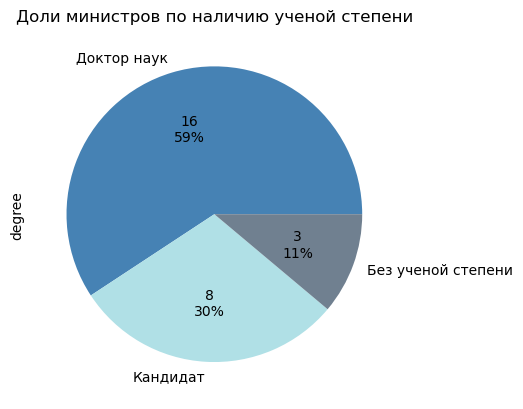

In [118]:
to_name1 = {0: 'Без ученой степени', 1: 'Кандидат', 2: 'Доктор наук'}
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

plt.figure(dpi=100)
plt.title('Доли министров по наличию ученой степени')

data['degree'].apply(lambda x: to_name1[x]).value_counts().plot(kind='pie', autopct=label_function,
                                                               colors=['steelblue', 'powderblue', 'slategray']);

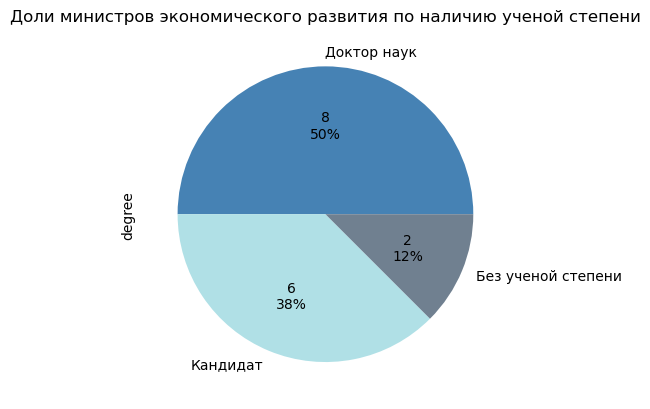

In [119]:
to_name1 = {0: 'Без ученой степени', 1: 'Кандидат', 2: 'Доктор наук'}
def label_function(val):
    return f'{val / 100 * len(separate):.0f}\n{val:.0f}%'

plt.figure(dpi=100)
plt.title('Доли министров экономического развития по наличию ученой степени')

separate['degree'].apply(lambda x: to_name1[x]).value_counts().plot(kind='pie', autopct=label_function,
                                                               colors=['steelblue', 'powderblue', 'slategray']);

Распределение целевой переменной

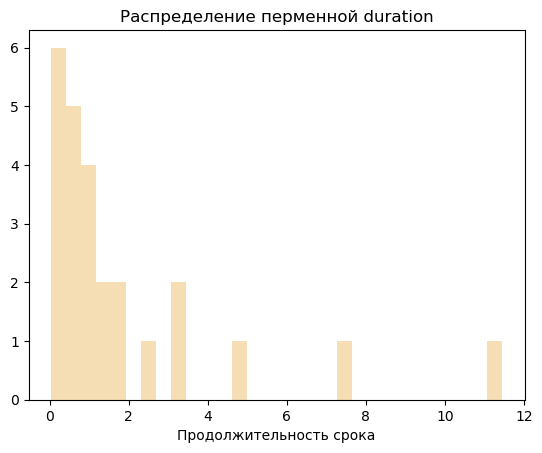

In [134]:
plt.figure(dpi=100)
plt.hist(data[data['duration'] != '-']['duration'], bins=30,
        color='wheat');
plt.title('Распределение перменной duration')
plt.xlabel('Продолжительность срока')
plt.show()

## Решающее дерево

Для всех имеющихся данных

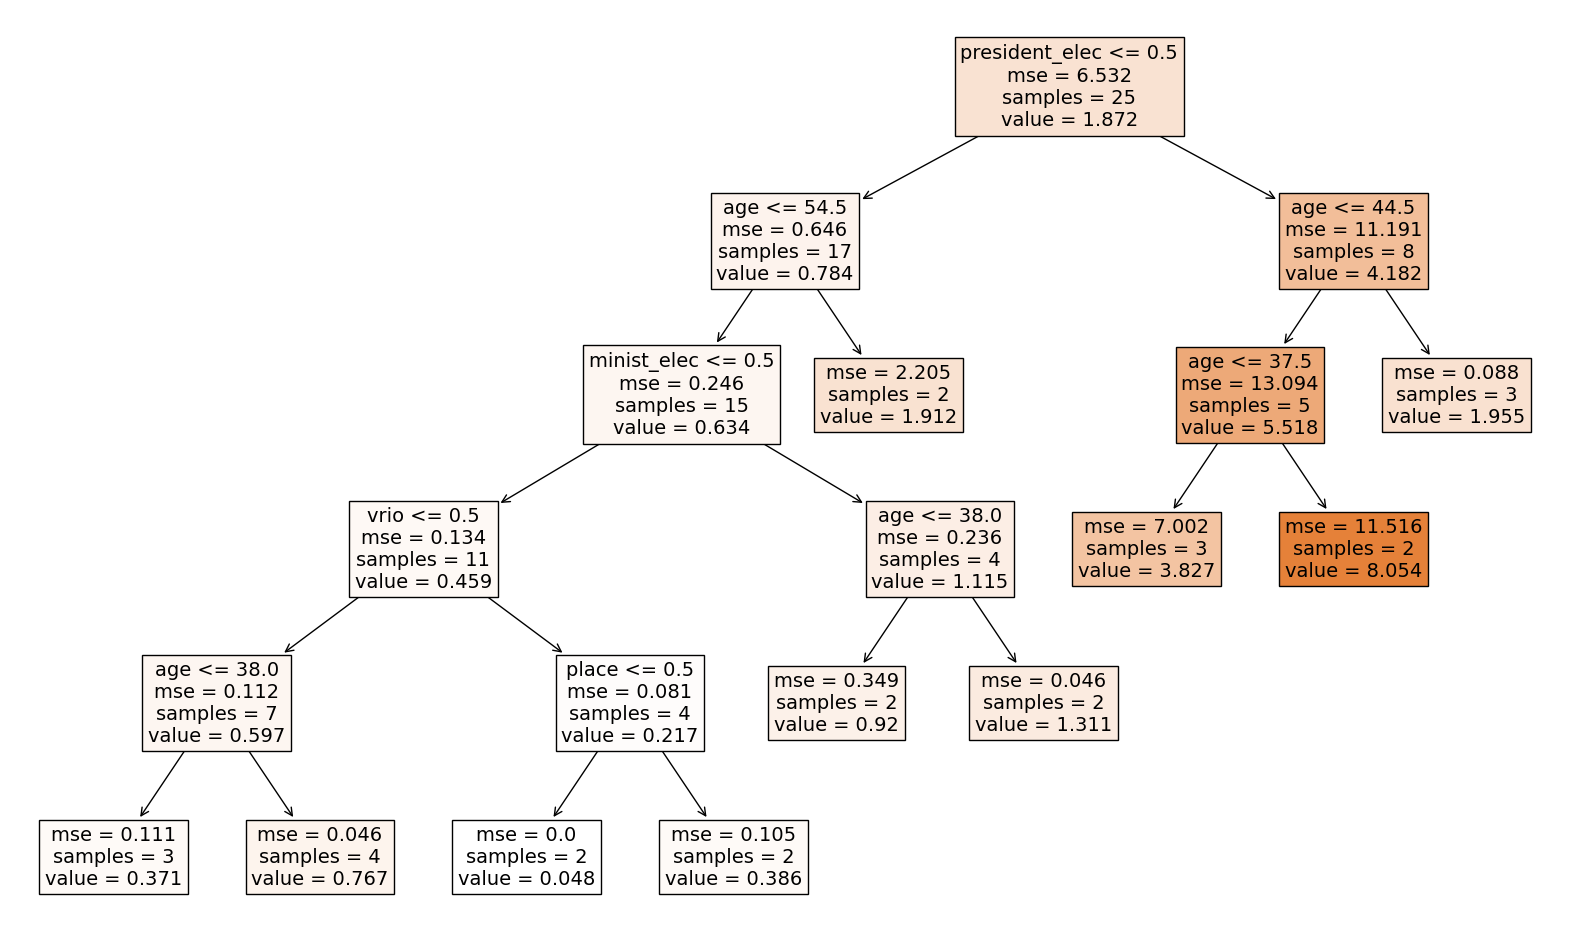

In [46]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

slice_data = data.loc[data['duration'] != '-']
X, y = slice_data[['age', 'president_elec', 'minist_elec', 'vrio', 'degree', 'has_party','place']], slice_data['duration']
X = pd.get_dummies(X, columns=['degree'], drop_first=True)
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, max_features='auto')
dt.fit(X, y)

fig = plt.figure(figsize=(20,12))
plot_tree(dt, fontsize=14, filled=True,
         feature_names=X.columns);

In [47]:
x = dt.predict([[40, 1, 1, 0, 1, 0, 1, 0]])
print('Предсказанная длительность срока:', round(x[0], 3), 'лет')

Предсказанная длительность срока: 8.054 лет


In [48]:
X_all = X.copy()
X_all['duration'] = y
X_all.to_csv('/Users/sasaatlasov/Desktop/Практика/data_all.csv')

Предсказание только по МинЭку

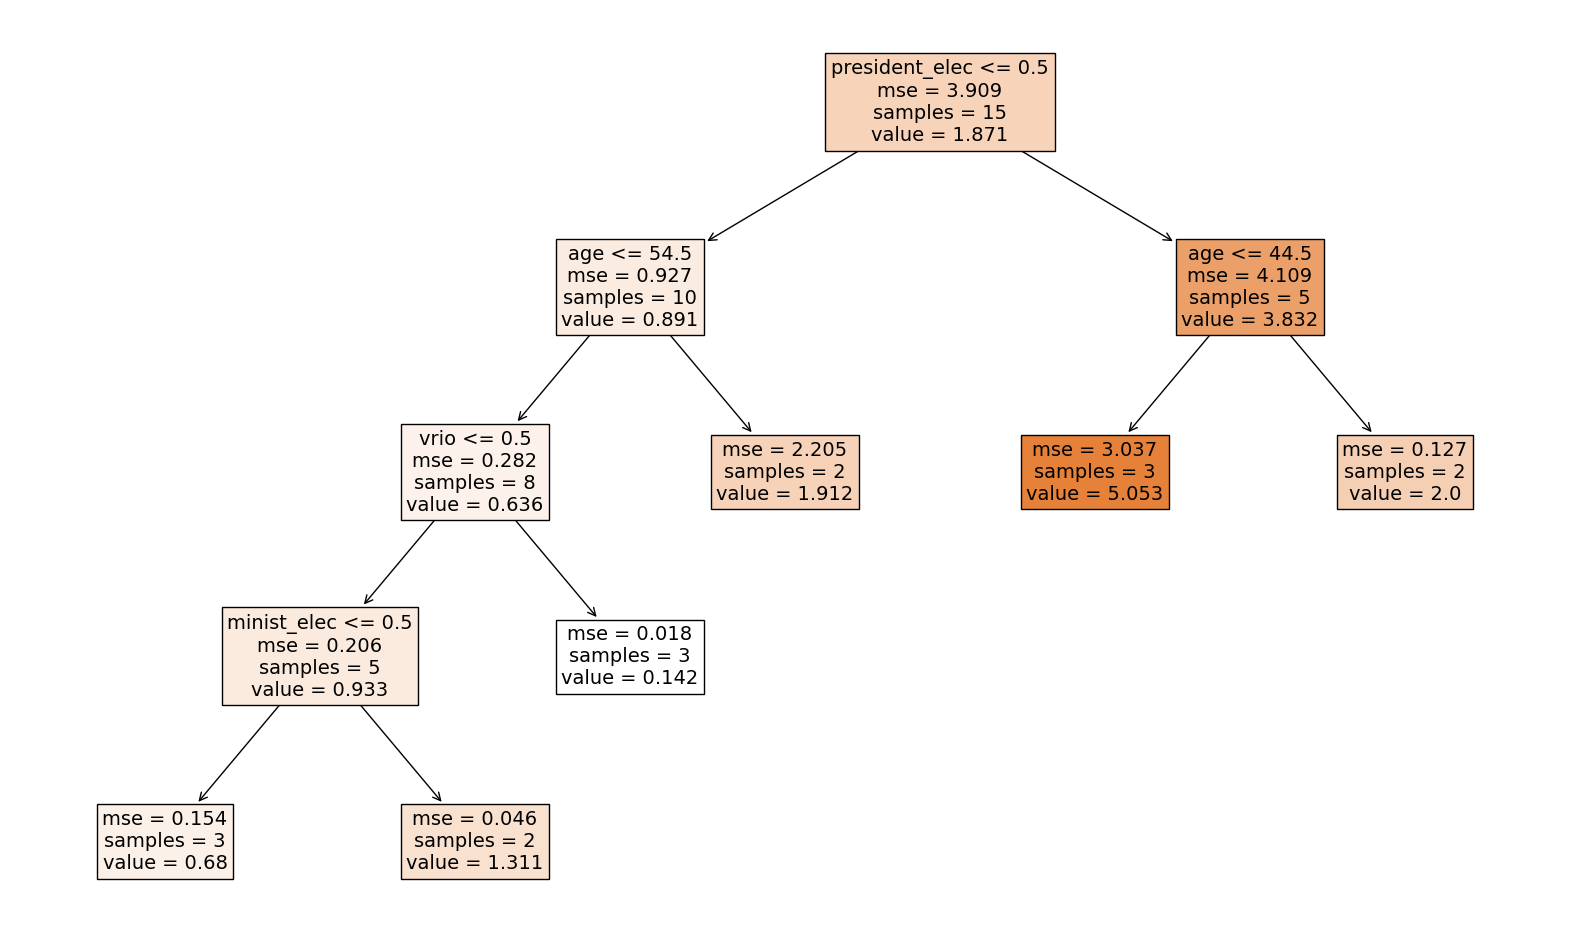

In [52]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

slice_data = separate.loc[separate['duration'] != '-']
X, y = slice_data[['age', 'president_elec', 'minist_elec', 'vrio', 'degree', 'has_party']], slice_data['duration']
X = pd.get_dummies(X, columns=['degree'], drop_first=True)
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, max_features='auto')
dt.fit(X, y)

fig = plt.figure(figsize=(20,12))
plot_tree(dt, fontsize=14, filled=True,
         feature_names=X.columns);

In [53]:
x = dt.predict([[40, 1, 1, 0, 1, 0, 1]])
print('Предсказанная длительность срока:', round(x[0], 3), 'лет')

Предсказанная длительность срока: 5.053 лет


In [54]:
X_sep = X.copy()
X_sep['duration'] = y
X_sep.to_csv('/Users/sasaatlasov/Desktop/Практика/data_sep.csv')

## Байесовская линейная регрессия

Форумула Байеса:

$$
p(\theta\mid x) = \frac{p(x\mid\theta)\cdot p(\theta)}{p(x)}
$$

В данном случае: 
1. $\theta$ - веса линейной регрессии и дисперсия случайной ошибки;
2. $x$ - имеющиеся данные;
3. $p(x\mid \theta)$ - распределение данных при условии параметров $\theta$
4. $p(\theta)$ - априорное распределение параметров, отражает наши предварительные знания о параметрах.

$p(x\mid \theta)=\mathcal{N}(X\beta, \sigma^2)\qquad p(\beta)=\mathcal{N}(0, 50^2) \qquad p(\sigma)=\mathcal{N}(0, 20)$

Для всех имеющихся данных

In [50]:
betas = np.array([-1.33771117,  -0.01453319,   3.25491857,   1.51962892,  -0.38748613,   0.75720891,
                  0.16555917,   1.76373320,   2.22324248])
pd.DataFrame(betas.reshape(1, -1), columns=['const'] + list(X.columns))

,const,age,president_elec,minist_elec,vrio,has_party,place,degree_1,degree_2
0,-1.337711,-0.014533,3.254919,1.519629,-0.387486,0.757209,0.165559,1.763733,2.223242


In [51]:
data_to_predict = np.array([[1, 48, 1, 1, 0, 1, 1, 0, 1]])
print('Предсказанная длительность срока:', np.round(data_to_predict @ betas , 3)[0], 'лет')

Предсказанная длительность срока: 5.885 лет


Предсказание только по МинЭку

In [56]:
betas = np.array([0.687394292,   0.004986908,   1.952366346,   0.861971374,  -1.289246222,   0.110711845,
                    0.331630528,  -0.095739468])
pd.DataFrame(betas.reshape(1, -1), columns=['const'] + list(X.columns))

,const,age,president_elec,minist_elec,vrio,has_party,degree_1,degree_2
0,0.687394,0.004987,1.952366,0.861971,-1.289246,0.110712,0.331631,-0.095739


In [58]:
data_to_predict = np.array([[1, 48, 1, 1, 0, 1, 1, 0]])
print('Предсказанная длительность срока:', np.round(data_to_predict @ betas , 3)[0], 'лет')

Предсказанная длительность срока: 4.183 лет
